**In the name of God**

#Linear and Polynomial Regression Analysis for Predictive Modeling
Student: : Mohammad Reza Baghestani

*   Supervisor: Dr. Amir Zamanidoost
*   date : 1404.08.30 (August 21, 2025)





**Part 1: Loading Data and Extracting Features**  
This section uploads the dataset files (Dataset_1_train.csv, Dataset_1_valid.csv, Dataset_1_test.csv) in Google Colab. It extracts the input features (X) and target values (Y) for the training, validation, and test sets. This prepares them for regression analysis. The data is read as NumPy arrays for efficient computation.

In [4]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv

uploaded = files.upload()

train = pd.read_csv('Dataset_1_train.csv').values
valid = pd.read_csv('Dataset_1_valid.csv').values
test = pd.read_csv('Dataset_1_test.csv').values

x_t, y_t = train[:, 0], train[:, 1]
x_v, y_v = valid[:, 0], valid[:, 1]
x_s, y_s = test[:, 0], test[:, 1]

Saving Dataset_1_test.csv to Dataset_1_test (1).csv
Saving Dataset_1_train.csv to Dataset_1_train (1).csv
Saving Dataset_1_valid.csv to Dataset_1_valid (1).csv


**Part 2: Linear Regression and RMSE Calculation**  
  This section does linear regression by calculating the slope and intercept using the normal equation method. It predicts values for the training set, validation set, and test set. It also computes the Root Mean Square Error (RMSE) for each set. The coefficients and RMSE values are printed to check the model's performance.

In [5]:
def get_line_coeffs(x, y):
    n = len(x)
    slope = (n * (x * y).sum() - x.sum() * y.sum()) / (n * (x**2).sum() - x.sum()**2)
    intercept = (y.sum() - slope * x.sum()) / n
    return np.array([intercept, slope])


def calc_rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)**2).mean())

coeffs = get_line_coeffs(x_t, y_t)
print(f"Zarayebe khatti (intercept, slope): {coeffs}")

y_t_pred = coeffs[0] + coeffs[1] * x_t
y_v_pred = coeffs[0] + coeffs[1] * x_v
y_s_pred = coeffs[0] + coeffs[1] * x_s

print(f"RMSE Train: {calc_rmse(y_t, y_t_pred):.4f}")
print(f"RMSE Valid: {calc_rmse(y_v, y_v_pred):.4f}")
print(f"RMSE Test: {calc_rmse(y_s, y_s_pred):.4f}")

Zarayebe khatti (intercept, slope): [-0.94173761 10.85600699]
RMSE Train: 5.4315
RMSE Valid: 5.9292
RMSE Test: 5.0853


**Part 3: Plotting Linear Regression Results**  
This section shows the linear regression results for the training, validation, and test datasets. All fitted lines are black, while scatter points vary: purple circles represent training, red stars stand for validation, and blue squares indicate test. Each plot’s title lists the RMSE value, and a legend identifies the data points and the fitted line. A grid improves clarity. This code is made for Google Colab and assumes data from earlier sections..

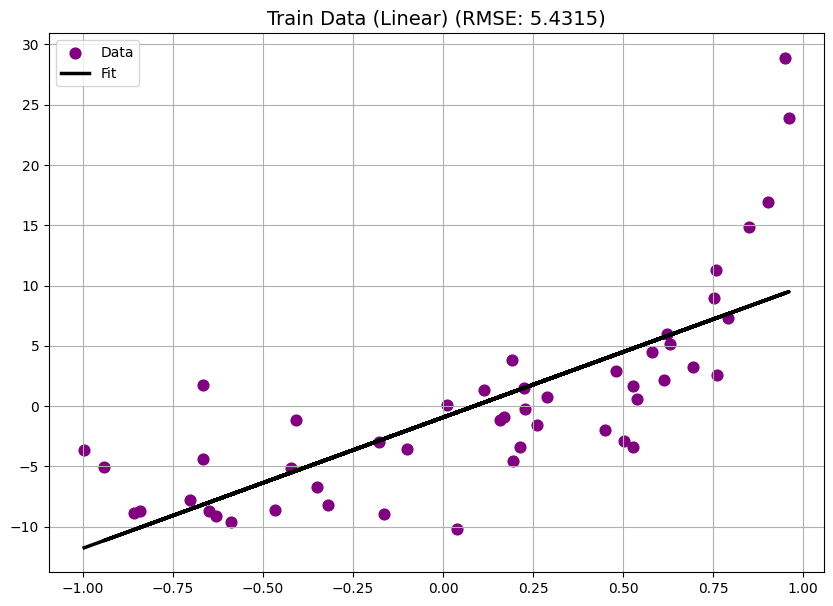

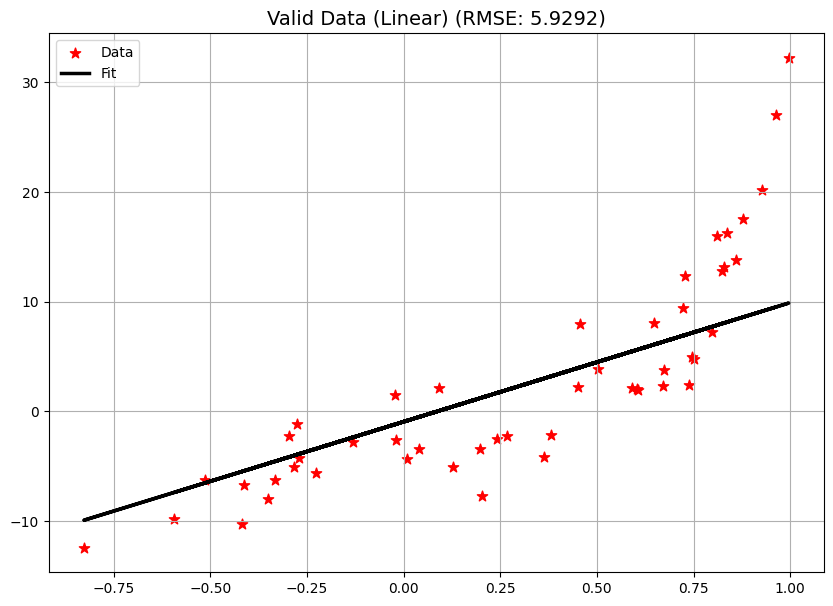

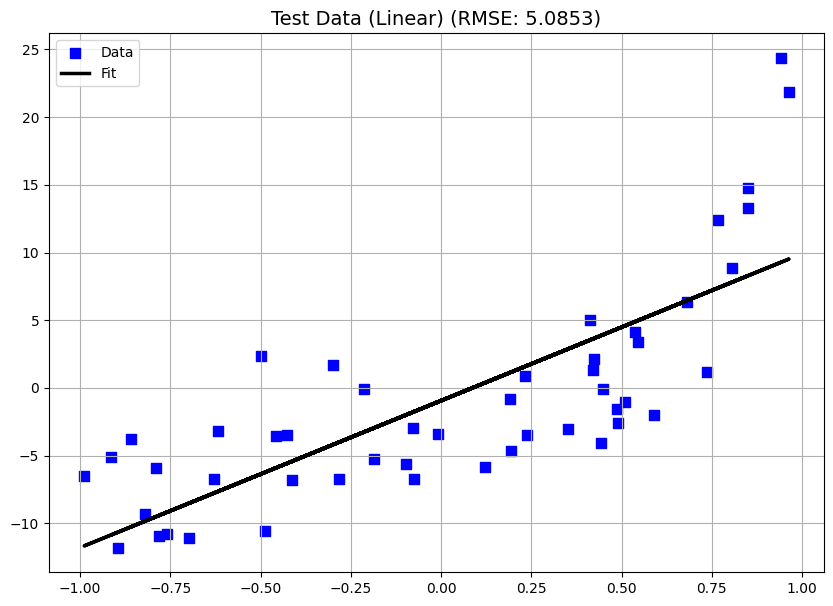

In [8]:

def calc_rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)**2).mean())


def rasme_khat(x, y, y_pred, title, color, marker):

    rmse_val = calc_rmse(y, y_pred)
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, c=color, s=60, marker=marker, label='Data')
    plt.plot(x, y_pred, c='black', lw=2.5, ls='-', label='Fit')
    plt.title(f"{title} (RMSE: {rmse_val:.4f})", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

rasme_khat(x_t, y_t, y_t_pred, "Train Data (Linear)", 'purple', 'o')
rasme_khat(x_v, y_v, y_v_pred, "Valid Data (Linear)", 'red', '*')
rasme_khat(x_s, y_s, y_s_pred, "Test Data (Linear)", 'blue', 's')

**Part 4: Polynomial Regression and RMSE Plot**  
This part runs polynomial regression for degrees 1 to 9. It calculates RMSE for training and validation sets. The results are plotted to show how model accuracy changes with each degree. Green circles mark training RMSE. Red circles mark validation RMSE. A grid helps with clarity.

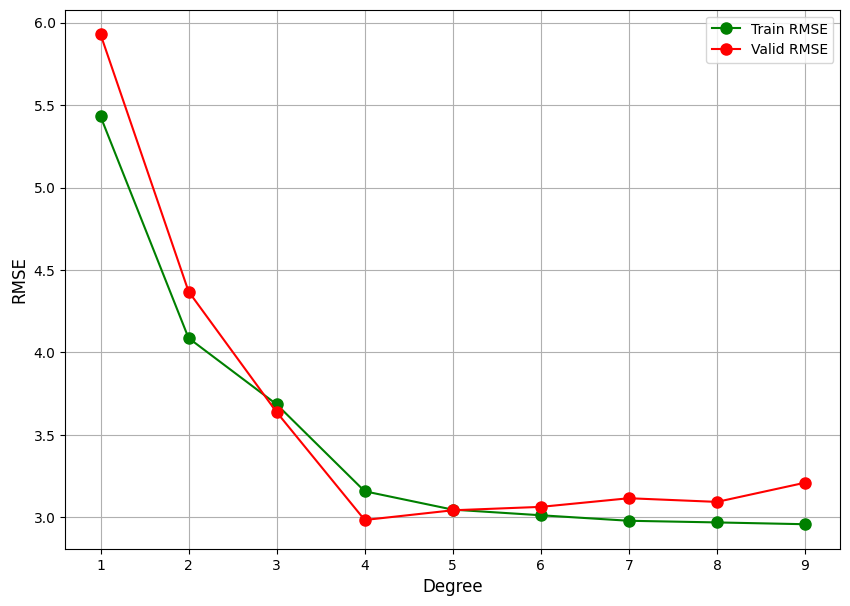

In [9]:

def sakhte_poly(x, deg):
    return np.vstack([x**i for i in range(deg + 1)]).T

train_rmse, valid_rmse = [], []
for d in range(1, 10):
    x_t_poly = sakhte_poly(x_t, d)
    x_v_poly = sakhte_poly(x_v, d)
    coeffs = inv(x_t_poly.T @ x_t_poly) @ x_t_poly.T @ y_t
    y_t_pred_poly = x_t_poly @ coeffs
    y_v_pred_poly = x_v_poly @ coeffs
    train_rmse.append(calc_rmse(y_t, y_t_pred_poly))
    valid_rmse.append(calc_rmse(y_v, y_v_pred_poly))

plt.figure(figsize=(10, 7))
plt.plot(range(1, 10), train_rmse, 'go-', label='Train RMSE', ms=8)
plt.plot(range(1, 10), valid_rmse, 'ro-', label='Valid RMSE', ms=8)
plt.xlabel("Degree", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

**Part 5: Polynomial Regression (Degree 4) with Improved Plots**  
This section fits a degree-4 polynomial to the training, validation, and test datasets and shows the results. From the RMSE plot in Section 4, we concluded that a degree-4 polynomial gives the best fit for our data, so we focus on it here. All fitted lines are black. The scatter points are different: purple circles represent training, red stars represent validation, and blue squares represent test.

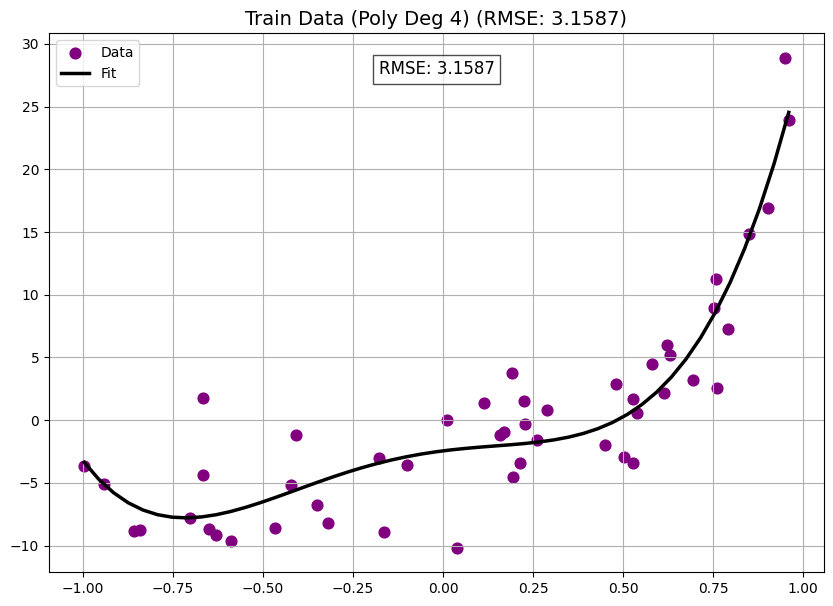

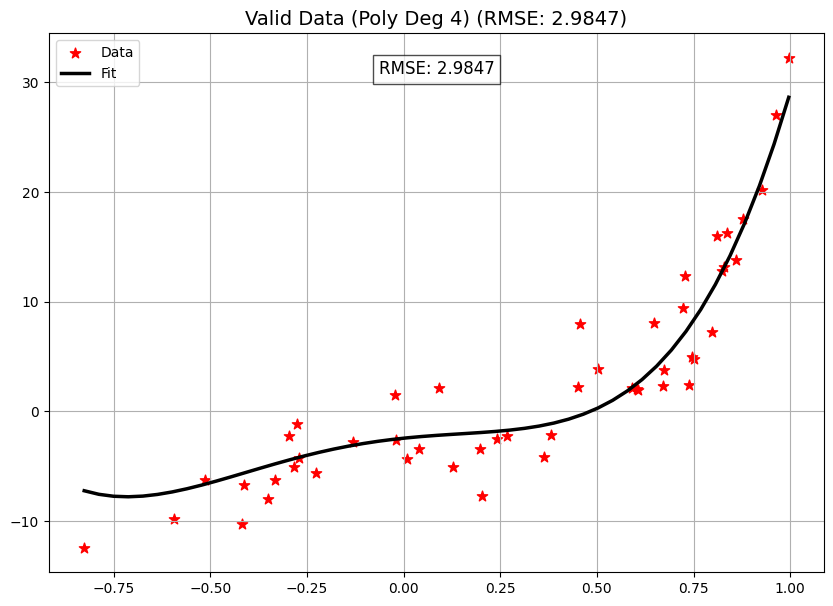

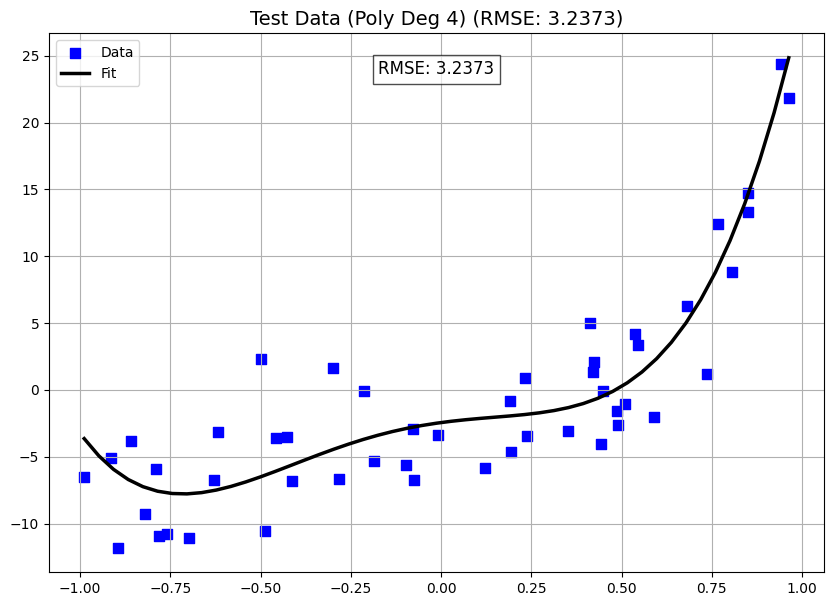

In [15]:

def sakhte_poly(x, deg):
    return np.vstack([x**i for i in range(deg + 1)]).T

def calc_rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred)**2).mean())
deg = 4
x_t_poly = sakhte_poly(x_t, deg)
coeffs = inv(x_t_poly.T @ x_t_poly) @ x_t_poly.T @ y_t

def rasme_monhani(x, y, x_fit, coeffs, title, color, marker):
    x_fit_poly = sakhte_poly(x_fit, len(coeffs) - 1)
    y_fit = x_fit_poly @ coeffs
    x_poly = sakhte_poly(x, len(coeffs) - 1)
    y_pred = x_poly @ coeffs
    rmse_val = calc_rmse(y, y_pred)
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, c=color, s=60, marker=marker, label='Data')
    plt.plot(x_fit, y_fit, c='black', lw=2.5, ls='-', label='Fit')
    plt.title(f"{title} (RMSE: {rmse_val:.4f})", fontsize=14)
    plt.text(0.5, 0.95, f'RMSE: {rmse_val:.4f}', fontsize=12, ha='center', va='top',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.7))
    plt.legend()
    plt.grid(True)
    plt.show()

x_fit_t = np.linspace(x_t.min(), x_t.max(), len(x_t))
x_fit_v = np.linspace(x_v.min(), x_v.max(), len(x_v))
x_fit_s = np.linspace(x_s.min(), x_s.max(), len(x_s))
rasme_monhani(x_t, y_t, x_fit_t, coeffs, "Train Data (Poly Deg 4)", 'purple', 'o')
rasme_monhani(x_v, y_v, x_fit_v, coeffs, "Valid Data (Poly Deg 4)", 'red', '*')
rasme_monhani(x_s, y_s, x_fit_s, coeffs, "Test Data (Poly Deg 4)", 'blue', 's')

It is worth noting that in this project, I improved the basic and standard coding style to make it easier to read and look more professional using AI. Whenever I faced any ambiguity or needed clarification, I asked for help from Grok AI to ensure the code was clear and optimized.